# WHO national life expectancy - Modelization

## Librairies

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [169]:
sns.set_theme(style="darkgrid")

## Import dataset

In [100]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Feature pre-selection based on EDA results

### Missing values pre-selection

In [101]:
miss_coeff = 0.8

In [102]:
df_missing = df.isna().sum() / df.shape[0]
df_prep = df[df.columns[df_missing < miss_coeff]]
df_prep.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN


### Columns pre-selection

In [103]:
health_dict = {
    'sanitary': ['basic_water'],
    'physical_shape': ['bmi', 'age5-19thinness', 'age5-19obesity'],
    'health_coverage': ['measles', 'polio', 'diphtheria'],
    'gov_investments': ['gghe-d', 'che_gdp']
}

In [104]:
mortality_cols = ['adult_mortality', 'infant_mort', 'age1-4mort']
std_life_cols = ['une_poverty', 'une_gni', 'gni_capita']
edu_cols = ['une_school', 'une_edu_spend']

health_cols = []
for k,v in health_dict.items():
    health_cols.extend(v)

geo_cols = ['region', 'country']
target = 'une_life'
cat_target = 'life_exp_cat'
enc_cols = geo_cols + [cat_target]

In [105]:
df_prep = df_prep[geo_cols + mortality_cols + std_life_cols + edu_cols + health_cols + [target]]
df_prep.head()

,region,country,adult_mortality,infant_mort,age1-4mort,une_poverty,une_gni,gni_capita,une_school,une_edu_spend,basic_water,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,gghe-d,che_gdp,une_life
0,Africa,Angola,383.5583,0.137985,0.025695,32.3,2530.0,2190.0,NaN,2.60753,41.14431,21.7,11.0,0.5,32.0,21.0,31.0,1.11099,1.90860,46.522
1,Africa,Angola,372.3876,0.133675,0.024500,NaN,2630.0,2290.0,NaN,NaN,42.25467,21.8,10.9,0.5,60.0,28.0,42.0,2.04631,4.48352,47.059
2,Africa,Angola,354.5147,0.128320,0.023260,NaN,3180.0,2690.0,NaN,NaN,43.37680,21.9,10.7,0.6,59.0,22.0,47.0,1.30863,3.32946,47.702
3,Africa,Angola,343.2169,0.122040,0.021925,NaN,3260.0,2820.0,NaN,NaN,44.36387,22.0,10.5,0.7,44.0,21.0,46.0,1.46560,3.54797,48.440
4,Africa,Angola,333.8711,0.115700,0.020545,NaN,3560.0,3080.0,NaN,NaN,45.35134,22.2,10.3,0.8,43.0,18.0,47.0,1.68663,3.96720,49.263


## Prototyping

### Preprocessing

#### Feature engineering : categorize target col

In [106]:
def categorize_target(life_exp: float) -> str:
    
    if life_exp < 50:
        return 'under 50'
    
    elif 50 <= life_exp <= 60:
        return '50-60'
    
    elif 60 < life_exp <= 70:
        return '60-70'
    
    elif 70 < life_exp <= 80:
        return '70-80'
    
    else:
        return 'above 80'

In [107]:
def feature_engineering(df_: pd.DataFrame) -> pd.DataFrame:
    df_[cat_target] = df_[target].apply(categorize_target)
    return df_.drop(target, axis=1)

#### Scaling

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

def scaling(df_: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    return scaler.fit_transform(df_[cols])

#### Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
encoder = LabelEncoder()

def encoding(df_: pd.DataFrame, col: str) -> np.array:
    return encoder.fit_transform(df_[col])

#### Imputation

In [112]:
def imputation(df_: pd.DataFrame) -> pd.DataFrame:
    
    for col in df_.columns[df_.isnull().any(axis=0)]:
        df_[col].fillna(df_[col].median(), inplace=True)
        
    return df_

#### Main preprocessing

In [113]:
def preprocessing(df_: pd.DataFrame, encode_cols: list, target_col: str):

    # Feature engineering
    df_ = feature_engineering(df_)
    
    # Scaling
    to_scale = df_.select_dtypes(exclude=['object']).columns
    df_[to_scale] = scaling(df_, cols=to_scale)

    # Encoding
    for col in encode_cols:
        df_[col] = encoding(df_, col)

    # Imputation
    df_ = imputation(df_)

    X = df_.drop(target_col, axis=1)
    y = df_[target_col]

    print(f'X shape {X.shape} | Y shape {y.shape}')
    print(f'{y.value_counts()}')

    return X, y


#### Train-test

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
rd_state = 2    # gives a better classes repartition between train/test
t_size = 0.2

In [116]:
train_set, test_set = train_test_split(df_prep, test_size=t_size, random_state=rd_state)

In [117]:
X_train, y_train = preprocessing(train_set, encode_cols=enc_cols, target_col=cat_target)

X shape (2488, 19) | Y shape (2488,)
2    1183
1     587
0     389
3     233
4      96
Name: life_exp_cat, dtype: int64


In [118]:
X_test, y_test = preprocessing(test_set, encode_cols=enc_cols, target_col=cat_target)

X shape (623, 19) | Y shape (623,)
2    290
1    160
0     95
3     51
4     27
Name: life_exp_cat, dtype: int64


In [119]:
X_test.head()

,region,country,adult_mortality,infant_mort,age1-4mort,une_poverty,une_gni,gni_capita,une_school,une_edu_spend,basic_water,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,gghe-d,che_gdp
1031,1,104,-0.578428,-0.606191,-0.570712,-0.485752,0.169544,0.245368,0.224051,0.272738,0.674557,1.153713,-0.842361,1.655475,0.824024,0.704392,0.693773,-0.059311,-0.104326
68,0,21,3.483362,0.740388,1.017195,-0.485752,-0.362714,-0.317390,0.224051,-0.060638,-0.420433,-0.646892,1.510323,-0.970312,0.385310,0.704392,0.693773,0.073694,-0.048951
677,0,64,0.417426,0.385799,0.342535,-0.485752,-0.629166,-0.353131,0.224051,-0.063249,-0.253980,-0.556862,0.196211,-0.879768,0.447983,0.513401,0.756213,-0.796134,-0.807137
1606,2,151,0.439065,0.769496,0.784622,-0.485752,-0.685940,-0.644672,0.224051,-1.316920,-1.776991,0.253410,-0.333672,-0.178049,-0.366770,-0.059569,0.006927,-0.650715,-0.226387
2808,5,57,0.175421,-0.439646,-0.507557,-0.485752,-0.496262,-0.423914,0.224051,-0.060638,0.586221,0.658547,-0.312477,0.184129,0.071943,0.577065,0.506451,-0.307685,-1.183941


### ML modelization - Classification prototype

This section is about testing some models and evaluation methods for classification made from initial target categories.  
A goal is also to get a first model, then work around it to make decent predictions.

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [121]:
tree_model = DecisionTreeClassifier(random_state=rd_state)
rd_model = RandomForestClassifier(random_state=rd_state)
knn_model = KNeighborsClassifier(n_neighbors=5)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [123]:
def eval_model(model, X_train, y_train, X_test, y_test, **kwargs: dict):

    # Train model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Show results
    plt.figure(figsize=(9, 6))
    sns.heatmap(
        confusion_matrix(y_test, y_pred), square=True, annot=True, cbar=False, fmt='d'
    )
    print(classification_report(y_test, y_pred))

    # Cross-validation
    N, train_score, val_score = learning_curve(model, X_train, y_train, **kwargs)

    print(f'max validation score : {val_score.max()}')
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Training score')
    plt.plot(N, val_score.mean(axis=1), label='Cross validation score')
    plt.title(f'{type(model).__name__} cross validation, k_folds = {kwargs["cv"]}')
    plt.legend()

    


In [124]:
cv_params = {
    'cv': 5,
    'train_sizes': np.linspace(0.1, 1, 10),
    'scoring': 'f1_micro',      # better choice because of class imbalances
    'shuffle': True,
    'random_state': rd_state
}

#### RandomForest evalutation

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        95
           1       0.95      0.93      0.94       160
           2       0.96      0.94      0.95       290
           3       0.78      1.00      0.88        51
           4       1.00      0.78      0.88        27

    accuracy                           0.94       623
   macro avg       0.93      0.92      0.92       623
weighted avg       0.94      0.94      0.94       623

max validation score : 0.9637826961770624


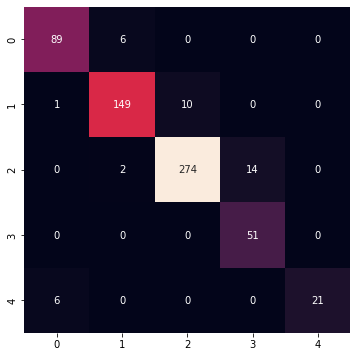

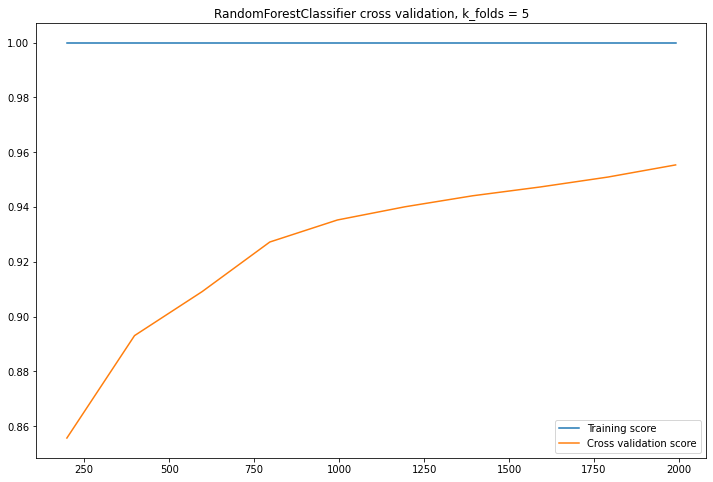

In [125]:
eval_model(rd_model, X_train, y_train, X_test, y_test, **cv_params)

#### KNN evaluation

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        95
           1       0.81      0.74      0.77       160
           2       0.85      0.91      0.88       290
           3       0.85      0.76      0.80        51
           4       1.00      0.78      0.88        27

    accuracy                           0.85       623
   macro avg       0.87      0.82      0.84       623
weighted avg       0.85      0.85      0.84       623

max validation score : 0.891566265060241


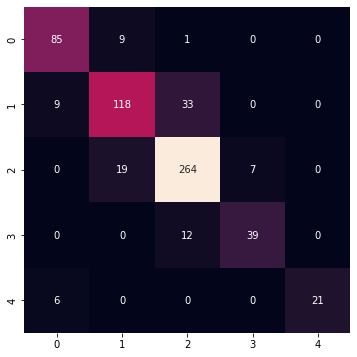

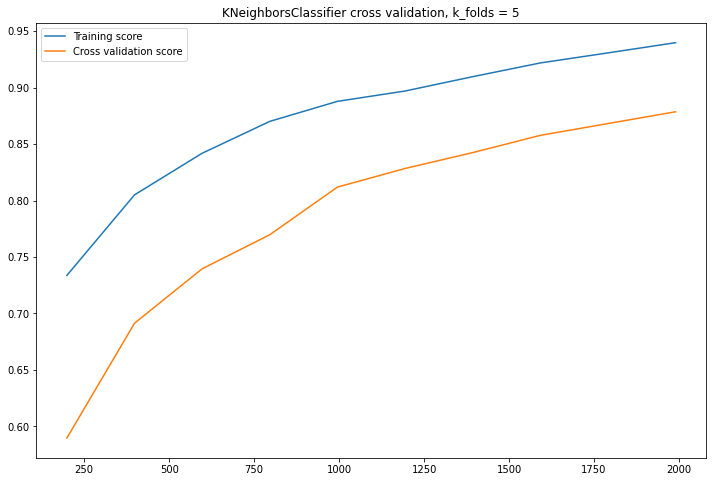

In [126]:
eval_model(knn_model, X_train, y_train, X_test, y_test, **cv_params)

#### RandomForest optimization

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
def optimizer(model, X: any, y: any, param_grid: dict, cv: int):
    
    # Create grid and fit
    grid = GridSearchCV(model, param_grid, cv=cv)
    grid.fit(X, y)
    
    # Print report
    print(f'Best params : {grid.best_params_}\n', f'Best score : {grid.best_score_}')
    
    return grid.best_estimator_

In [129]:
# Random Forest grid
rd_param_grid = {
    'n_estimators': np.arange(100, 120),
    'criterion': ['gini', 'entropy']
}

In [130]:
best_rd_forest = optimizer(
    rd_model, X_train, y_train, rd_param_grid, cv=cv_params['cv']
)


Best params : {'criterion': 'entropy', 'n_estimators': 102}
 Best score : 0.9586022157038616


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.95      0.93      0.94       160
           2       0.96      0.95      0.96       290
           3       0.80      1.00      0.89        51
           4       1.00      0.81      0.90        27

    accuracy                           0.94       623
   macro avg       0.93      0.93      0.92       623
weighted avg       0.94      0.94      0.94       623

max validation score : 0.9637826961770624


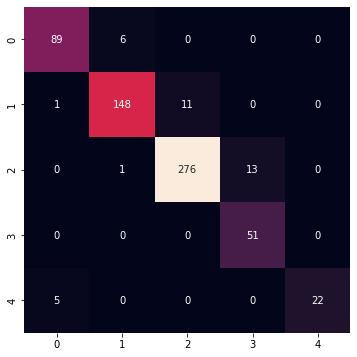

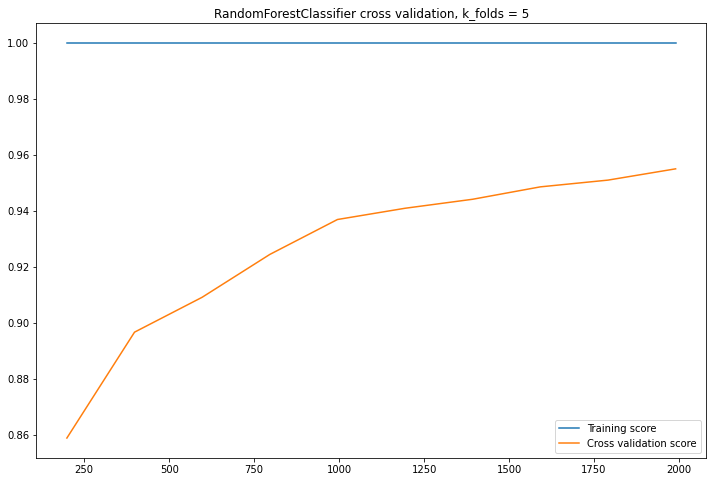

In [131]:
eval_model(best_rd_forest, X_train, y_train, X_test, y_test, **cv_params)

#### KNN optimization

In [132]:
knn_param_grid = {
    'n_neighbors': np.arange(3, 20),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [133]:
best_knn = optimizer(knn_model, X_train, y_train, knn_param_grid, cv=cv_params['cv'])

Best params : {'metric': 'manhattan', 'n_neighbors': 3}
 Best score : 0.9332711126194921


              precision    recall  f1-score   support

           0       0.91      0.87      0.89        95
           1       0.90      0.91      0.90       160
           2       0.93      0.95      0.94       290
           3       0.82      0.82      0.82        51
           4       0.96      0.85      0.90        27

    accuracy                           0.91       623
   macro avg       0.90      0.88      0.89       623
weighted avg       0.91      0.91      0.91       623

max validation score : 0.9558232931726908


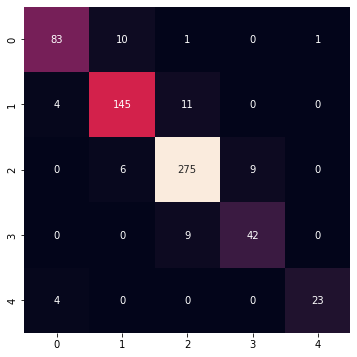

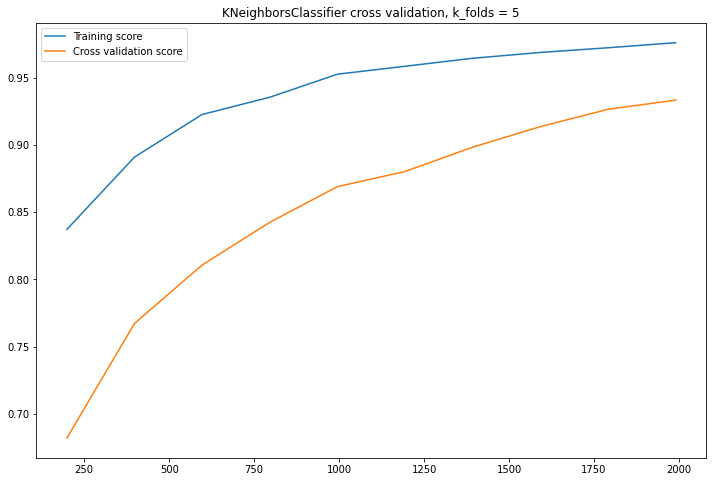

In [134]:
eval_model(best_knn, X_train, y_train, X_test, y_test, **cv_params)

## Advanced preprocessing/modelization

In [203]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

### Custom transformers

In [204]:
class FeaturePreSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names: list[str]):
        self.feature_names = feature_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.loc[:, self.feature_names].copy(deep=True)

We have to encapsulate LabelEncoder in a custom class, because its fit_transform method only take 2 args (self, X) and not 3 (self, X, y) as the sklearn pipeline does.

In [205]:
def transform_y(y: pd.Series) -> np.ndarray:
    y_ = y.copy(deep=True)
    y_ = y.apply(categorize_target)
    y_ = LabelEncoder().fit_transform(y_)
    return y_
    

### Pipelines

#### Preprocessing

In [138]:
imput_strat = 'median'
cat_cols = geo_cols
num_cols = mortality_cols + std_life_cols + edu_cols + health_cols
pre_features = num_cols + cat_cols

In [223]:
def preprocess_model(model):
    
    num_transformer = make_pipeline(SimpleImputer(strategy=imput_strat), StandardScaler(), PCA(n_components=3))
    cat_transformer = OneHotEncoder(handle_unknown='ignore')
    
    preprocessor = ColumnTransformer([
        ('numerical', num_transformer, num_cols),
        ('categorical', cat_transformer, cat_cols)
    ])
    
    return Pipeline([
        ('pre_select', FeaturePreSelector(feature_names=pre_features)),
        ('preprocess', preprocessor),
        ('clf', model)
    ])

#### Train/test

In [224]:
train_set2, test_set2 = train_test_split(df, test_size=t_size, random_state=rd_state)

In [225]:
X_train2, y_train2 = train_set2.drop(target, axis=1), transform_y(train_set2[target])
X_test2, y_test2 = test_set2.drop(target, axis=1), transform_y(test_set2[target])

#### Results

In [220]:
pipe = preprocess_model(KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
pipe.fit(X_train2, y_train2)

Pipeline(steps=[('pre_select',
                 FeaturePreSelector(feature_names=['adult_mortality',
                                                   'infant_mort', 'age1-4mort',
                                                   'une_poverty', 'une_gni',
                                                   'gni_capita', 'une_school',
                                                   'une_edu_spend',
                                                   'basic_water', 'bmi',
                                                   'age5-19thinness',
                                                   'age5-19obesity', 'measles',
                                                   'polio', 'diphtheria',
                                                   'gghe-d', 'che_gdp',
                                                   'region', 'country'])),
                ('preprocess',
                 ColumnTransformer(transformers=[('...
                                                  ['adult_mortali

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        95
           1       0.88      0.91      0.90       160
           2       0.92      0.95      0.94       290
           3       0.93      0.73      0.81        51
           4       0.89      0.89      0.89        27

    accuracy                           0.91       623
   macro avg       0.91      0.87      0.89       623
weighted avg       0.91      0.91      0.91       623

max validation score : 0.9196787148594378


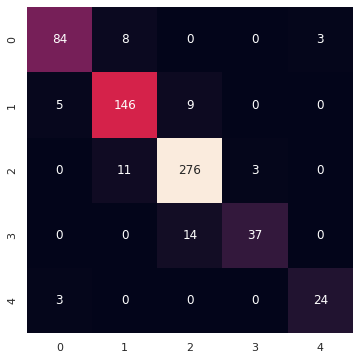

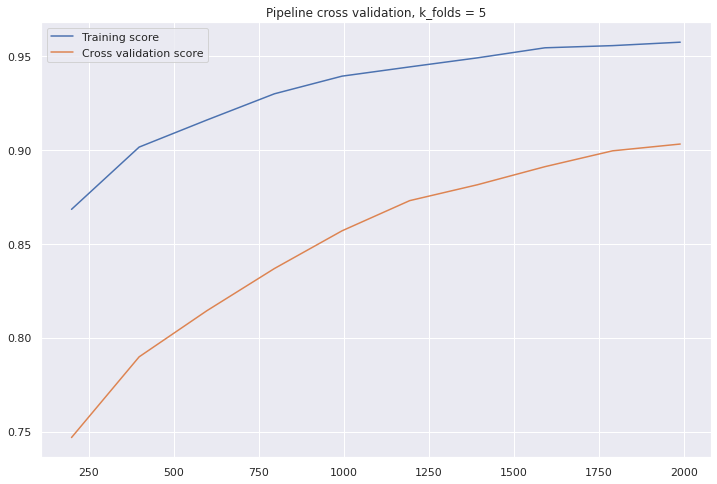

In [226]:
eval_model(pipe, X_train2, y_train2, X_test2, y_test2, **cv_params)

#### Optimization

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [227]:
n = 50   # number of iteration in the grid search
param_grid = {
    'preprocess__numerical__pca__n_components': np.arange(2, 17),
    'clf__n_neighbors': np.arange(2, 20),
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [228]:
grid = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    n_iter=n,
    scoring=cv_params['scoring'],     # better because of class imbalances
    cv=cv_params['cv']
)
grid.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_select',
                                              FeaturePreSelector(feature_names=['adult_mortality',
                                                                                'infant_mort',
                                                                                'age1-4mort',
                                                                                'une_poverty',
                                                                                'une_gni',
                                                                                'gni_capita',
                                                                                'une_school',
                                                                                'une_edu_spend',
                                                                                'basic_water',
                                                             

In [217]:
grid.best_params_

{'preprocess__numerical__pca__n_components': 3,
 'clf__n_neighbors': 2,
 'clf__metric': 'euclidean'}

In [218]:
grid.best_score_

0.9039376823188124

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        95
           1       0.90      0.91      0.90       160
           2       0.94      0.95      0.95       290
           3       1.00      0.73      0.84        51
           4       1.00      0.74      0.85        27

    accuracy                           0.91       623
   macro avg       0.93      0.86      0.89       623
weighted avg       0.92      0.91      0.91       623

max validation score : 0.9497991967871486


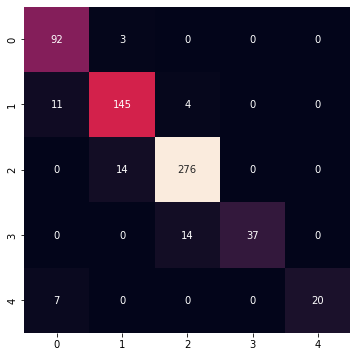

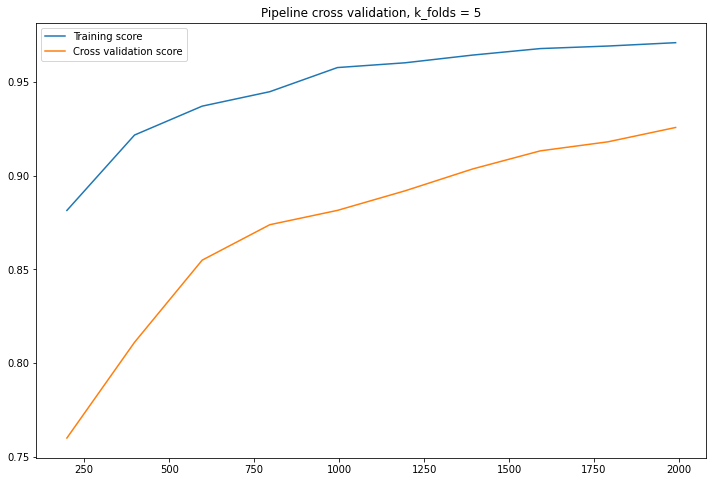

In [149]:
eval_model(grid.best_estimator_, X_train2, y_train2, X_test2, y_test2, **cv_params)

#### Introducing PCA

In [160]:
from matplotlib.ticker import PercentFormatter
from sklearn.decomposition import PCA

In [173]:
def pareto(data: any) -> None:
    
    y = list(data)
    x = range(len(y))
    ycum = np.cumsum(y)
    
    plt.figure(figsize=(9, 6))
    plt.bar(x, y)
    plt.plot(x, ycum,"-r")

In [196]:
def pareto_detailed(data):

    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()
    ax.bar(x,y)

    ax2 = ax.twinx()
    ax2.plot(x, ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80, color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    
    plt.ylim(0,110)

In [197]:
def make_pca(X: any) -> np.ndarray :
    
    pca = PCA()
    pca.fit(X)
    
    pareto(pca.explained_variance_ratio_)
    pareto_detailed(pca.explained_variance_ratio_)

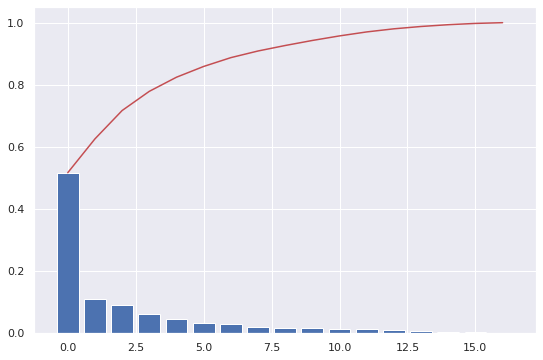

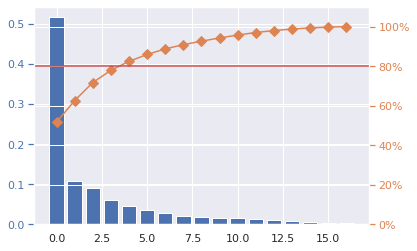

In [198]:
make_pca(X_train.drop(cat_cols, axis=1))